# Analyzing DO data across a fresh-estuarine gradient of the Lower St. Johns River using Python
### Created July 2016 by Natalie Nelson, nataliegnelson@ufl.edu
-------------------------------------------------------

# 0 Import packages

#### Python has a variety of packages that contain functions for specific purposes. For example, "pandas" stands for Python Data Analysis Library and contains data analysis tools (http://pandas.pydata.org/). NumPy was designed for use in scientific computing and its functions are particularly useful for high-level computation (http://www.numpy.org/). Matplotlib is a plotting library that includes a wide range of useful plotting functions (http://matplotlib.org/). Packages have to be explicitly loaded to permit access to their functions. 

In [79]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# 1 Organize

#### First, let's import and organize the data that you downloaded from the CUAHSI HydroClient. You may need to update the file paths  below if your directory structure is different than what is shown in the assignment document.

### 1.1 Import data
###### 1.1.1 Upstream

In [80]:
## parse_dates tells python which column contains date/time data
## index_col assigns row index to specified column values
up_DO = pd.read_csv('Data/Clean/upstream/upstream-DO_mgL.csv',
                    parse_dates=['LocalTimestamp'],
                    index_col = 'LocalTimestamp')
up_level = pd.read_csv('Data/Clean/upstream/upstream-level_ft.csv',
                       parse_dates=['LocalTimestamp'],
                       index_col = 'LocalTimestamp')
up_wtemp = pd.read_csv('Data/Clean/upstream/upstream-wtemp_C.csv',
                       parse_dates=['LocalTimestamp'],
                       index_col = 'LocalTimestamp')

In [81]:
## rename columns
up_DO.columns = ['DO']
up_level.columns = ['Level']
up_wtemp.columns = ['WaterTemp']

###### 1.1.2 Transitional

In [82]:
## upload transitional data
tr_DO = pd.read_csv('Data/Clean/transitional/transitional-DO_mgL.csv',
                    parse_dates=['LocalTimestamp'],
                    index_col = 'LocalTimestamp')
tr_level = pd.read_csv('Data/Clean/transitional/transitional-level_ft.csv',
                       parse_dates=['LocalTimestamp'],
                       index_col = 'LocalTimestamp')
tr_wtemp = pd.read_csv('Data/Clean/transitional/transitional-wtemp_C.csv',
                       parse_dates=['LocalTimestamp'],
                       index_col = 'LocalTimestamp')

In [83]:
## rename columns
tr_DO.columns = ['DO']
tr_level.columns = ['Level']
tr_wtemp.columns = ['WaterTemp']

###### 1.1.3 Estuarine

In [84]:
## upload estuarine data
es_DO = pd.read_csv('Data/Clean/estuarine/estuarine-DO_mgL.csv',
                    parse_dates=['LocalTimestamp'],
                    index_col = 'LocalTimestamp')
es_level = pd.read_csv('Data/Clean/estuarine/estuarine-level_ft.csv',
                       parse_dates=['LocalTimestamp'],
                       index_col = 'LocalTimestamp')
es_wtemp = pd.read_csv('Data/Clean/estuarine/estuarine-wtemp_C.csv',
                       parse_dates=['LocalTimestamp'],
                       index_col = 'LocalTimestamp')

In [85]:
## rename columns
es_DO.columns = ['DO']
es_level.columns = ['Level']
es_wtemp.columns = ['WaterTemp']

#### The data are currently in individual arrays, but they should ideally be organized into datasets that correspond to each of the river reaches that we're evaluating. 

### 1.2 Generate datasets for the river reaches

In [86]:
## let's look at the first three rows of the upstream DO data
up_DO[:3]

,DO
LocalTimestamp,
2015-01-01 00:00:00,8.9
2015-01-01 01:00:00,8.9
2015-01-01 02:00:00,8.9


In [87]:
## now let's look at the upstream water level data
up_level[:3]

,Level
LocalTimestamp,
2015-01-01 00:00:00,1.9
2015-01-01 00:15:00,1.9
2015-01-01 00:30:00,1.9


#### Note that these data have different temporal resolution - the DO data are hourly, but the water level data were captured every 15 minutes. We want to create a single data frame that contains our total dataset, but we need to make sure the data collection timestamps match.

###### 1.2.1 Upstream dataset

In [88]:
## to do this, we can merge the data using the LocalTimestamp columns in each of our imported 
## data series:
upstream = up_level.join(up_DO)
upstream = upstream.join(up_wtemp)

In [89]:
## let's look at the first few rows of our newly merged data frame named "upstream"
upstream[:10]

,Level,DO,WaterTemp
LocalTimestamp,,,
2015-01-01 00:00:00,1.90,8.9,17.6
2015-01-01 00:15:00,1.90,NaN,NaN
2015-01-01 00:30:00,1.90,NaN,NaN
2015-01-01 00:45:00,1.91,NaN,NaN
2015-01-01 01:00:00,1.91,8.9,17.6
2015-01-01 01:15:00,1.92,NaN,NaN
2015-01-01 01:30:00,1.92,NaN,NaN
2015-01-01 01:45:00,1.93,NaN,NaN
2015-01-01 02:00:00,1.93,8.9,17.6


###### 1.2.2 Transitional dataset

In [90]:
transitional = tr_level.join(tr_DO)
transitional = transitional.join(tr_wtemp)
transitional[:5]

,Level,DO,WaterTemp
LocalTimestamp,,,
2015-01-01 00:00:00,1.09,7.8,18.4
2015-01-01 00:15:00,1.10,7.8,18.4
2015-01-01 00:30:00,1.09,7.8,18.4
2015-01-01 00:45:00,1.09,7.7,18.4
2015-01-01 01:00:00,1.09,7.7,18.4


#### Note that all transitional data have a timestep of 15 minutes.

###### 1.2.3 Estuarine dataset

In [91]:
estuarine = es_level.join(es_DO)
estuarine = estuarine.join(es_wtemp)
estuarine[:5]

,Level,DO,WaterTemp
LocalTimestamp,,,
2015-01-01 00:00:00,-0.50,8.8,14.5
2015-01-01 00:15:00,-0.53,NaN,NaN
2015-01-01 00:30:00,-0.54,NaN,NaN
2015-01-01 00:45:00,-0.57,NaN,NaN
2015-01-01 01:00:00,-0.58,8.6,14.3


###### 1.2.4 LSJR dataset (ALL data: upstream, transitional, estuarine)

In [92]:
lsjr = upstream.join(transitional,rsuffix='_tr')
lsjr = lsjr.join(estuarine,rsuffix='_es')
lsjr.columns.values[0:3] = ['Level_up','DO_up','WaterTemp_up']
lsjr[:5]

,Level_up,DO_up,WaterTemp_up,Level_tr,DO_tr,WaterTemp_tr,Level_es,DO_es,WaterTemp_es
LocalTimestamp,,,,,,,,,
2015-01-01 00:00:00,1.90,8.9,17.6,1.09,7.8,18.4,-0.50,8.8,14.5
2015-01-01 00:15:00,1.90,NaN,NaN,1.10,7.8,18.4,-0.53,NaN,NaN
2015-01-01 00:30:00,1.90,NaN,NaN,1.09,7.8,18.4,-0.54,NaN,NaN
2015-01-01 00:45:00,1.91,NaN,NaN,1.09,7.7,18.4,-0.57,NaN,NaN
2015-01-01 01:00:00,1.91,8.9,17.6,1.09,7.7,18.4,-0.58,8.6,14.3


# 2 Analyze

#### Let's start playing with the data! For this analysis, we're going to keep it simple. The code blocks below produce plots that allow for data to be visualized in a few different ways. 
#### As you inspect these plots, think about the following: do you see any relationships between water temperature, water level, and DO? Are there seasonal differences in these relationships? How to patterns in the data change between the upstream, transitional, and estuarine sites?

### 2.1 DO

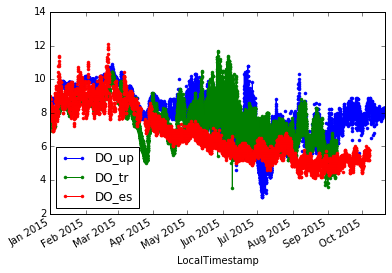

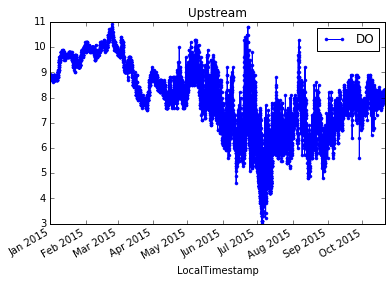

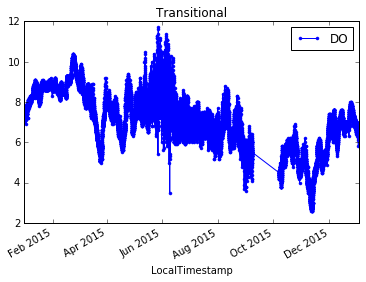

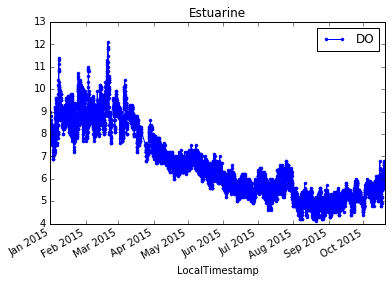

In [93]:
## use pd.concat to create a new dataframe composed of specific lsjr columns
df = pd.concat([lsjr['DO_up'],lsjr['DO_tr'],lsjr['DO_es']],axis=1)

## create a multi-line plot
df.plot(marker='.')

## plot each of the three DO time series independently
up_DO.plot(marker='.', title = 'Upstream')
tr_DO.plot(marker='.', title = 'Transitional')
es_DO.plot(marker='.', title = 'Estuarine')

In [94]:
## increase plot size for subsequent figures
plt.rcParams['figure.figsize'] = (16,12)

#### We can also look at seasonal variability by looking at specific months. The code below creates data subsets for January and July. Do you think these are the best months to evaluate to detect seasonal variation in the data? To look at other months, simply edit the code.

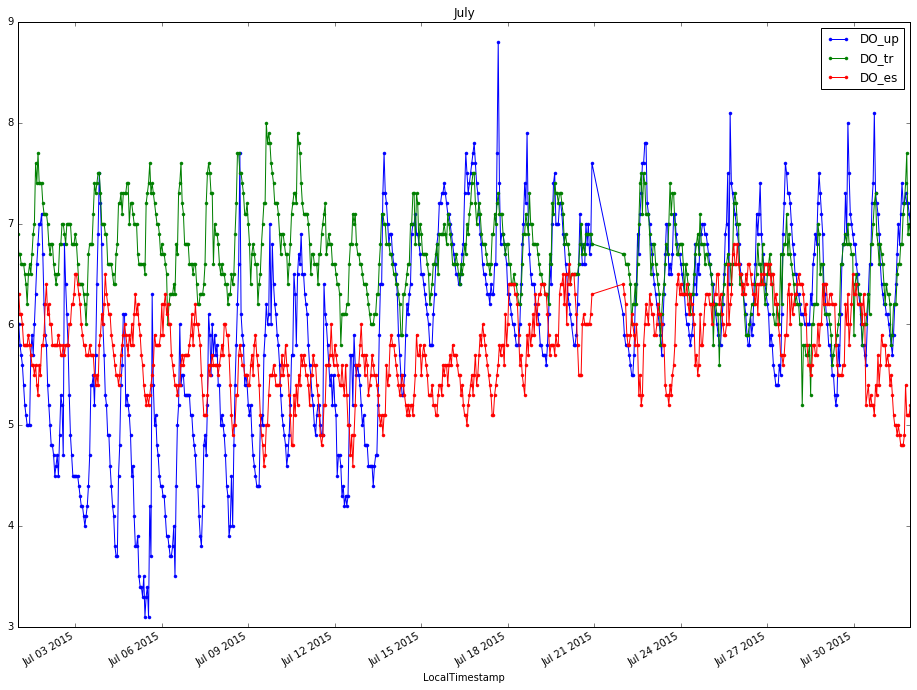

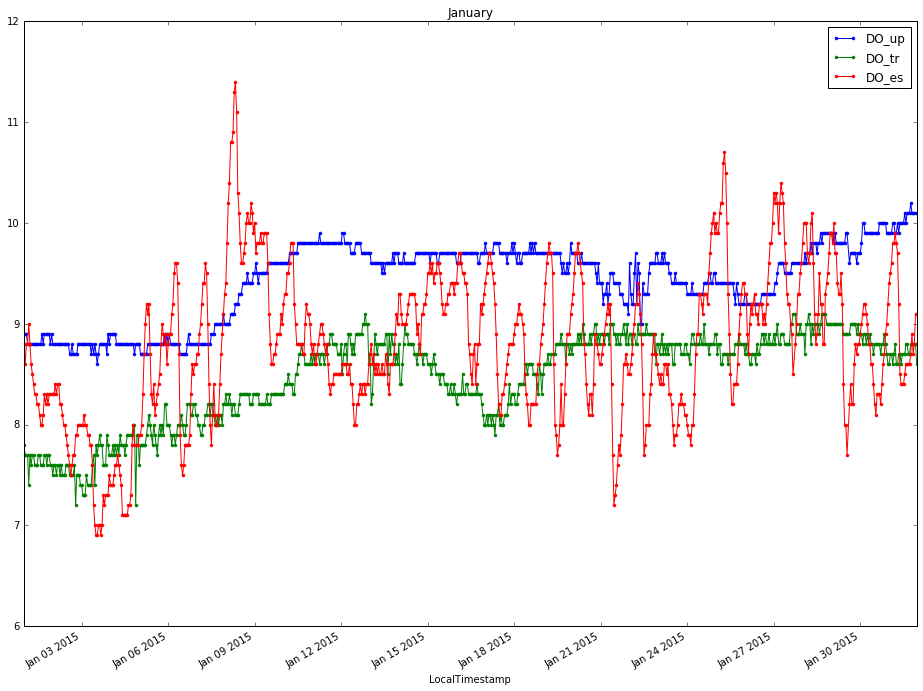

In [95]:
## create July subset and plot
dfjul = df[(df.index.month == 7)]
dfjul.dropna().plot(marker='.',title='July') # here, drop.na() has been used to get rid of 
                                             # rows that contain NA values, since these will
                                             # interfere with the plot.

## create January subset and plot
dfjan = df[(df.index.month == 1)]
dfjan.dropna().plot(marker='.',title='January')

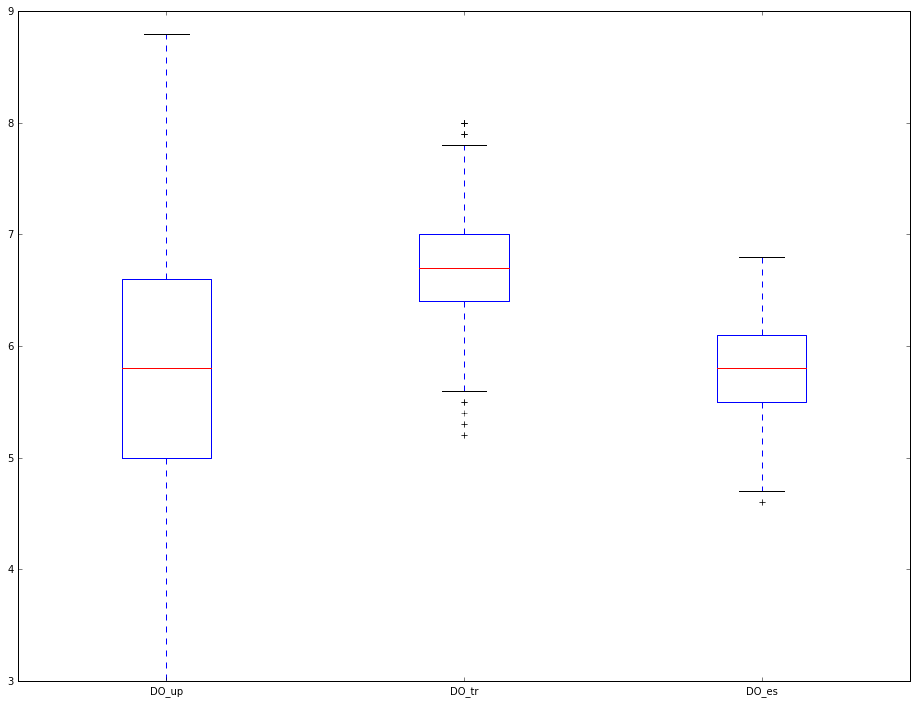

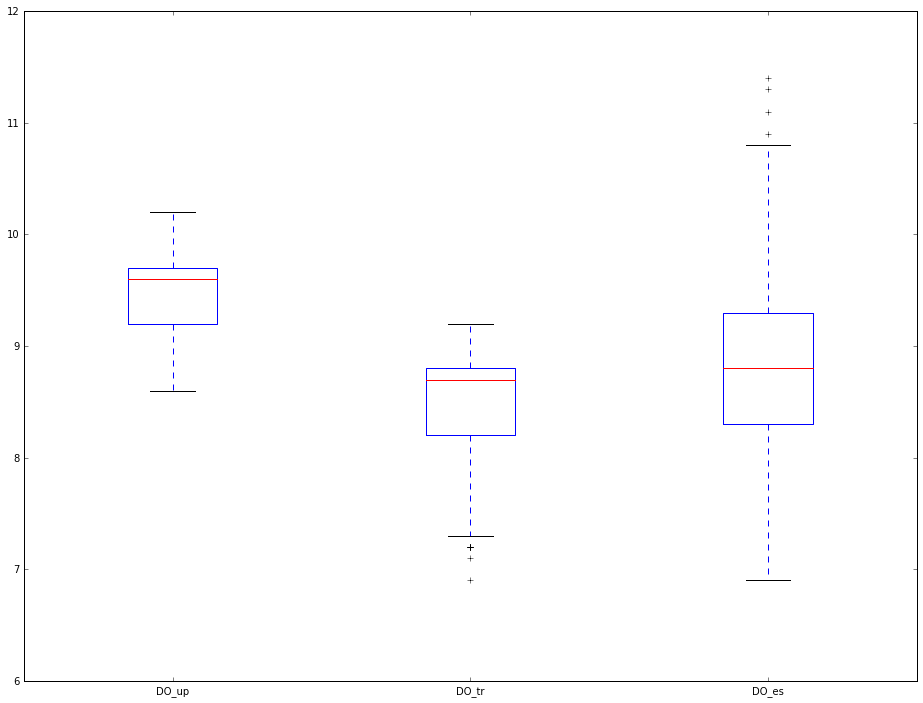

In [96]:
## July and January boxplots
dfjul.plot.box()
dfjan.plot.box()

### 2.2 Water level

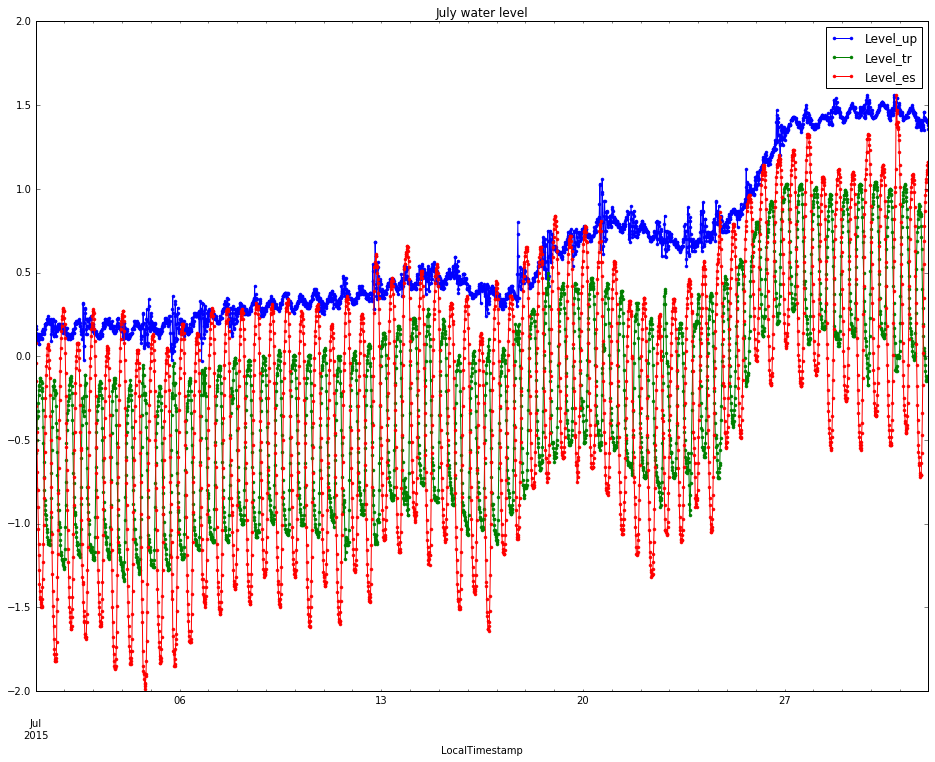

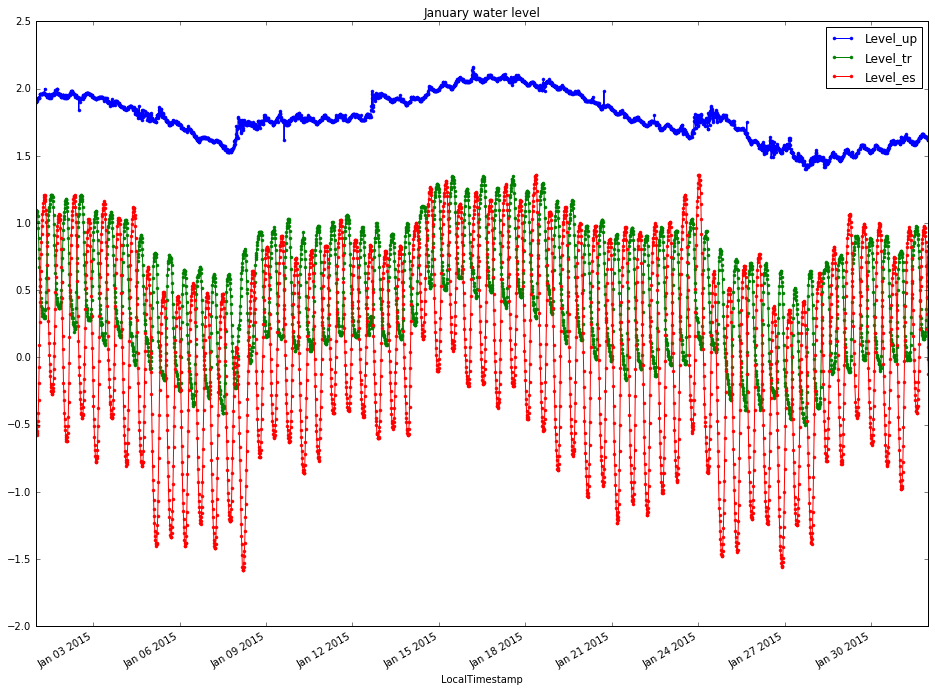

In [97]:
## use pd.concat to create a new dataframe composed of specific lsjr columns
df_lv = pd.concat([lsjr['Level_up'],lsjr['Level_tr'],lsjr['Level_es']],axis=1)

## create July subset and plot
df_lv_jul = df_lv[(df.index.month == 7)]
df_lv_jul.dropna().plot(marker='.',title='July water level')

## create January subset and plot
df_lv_jan = df_lv[(df.index.month == 1)]
df_lv_jan.dropna().plot(marker='.',title='January water level')

### 2.3 Water temperature

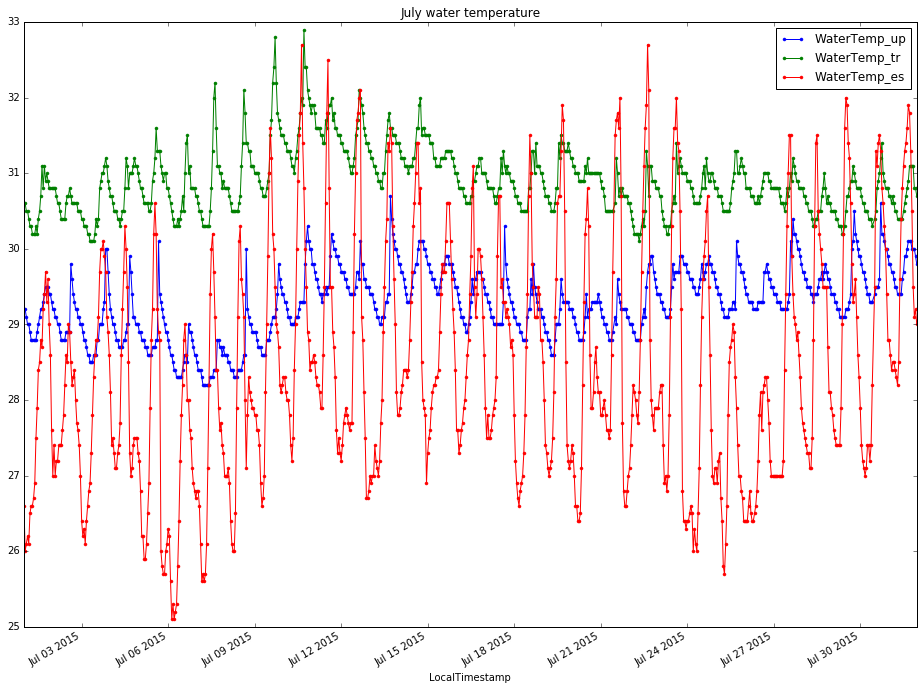

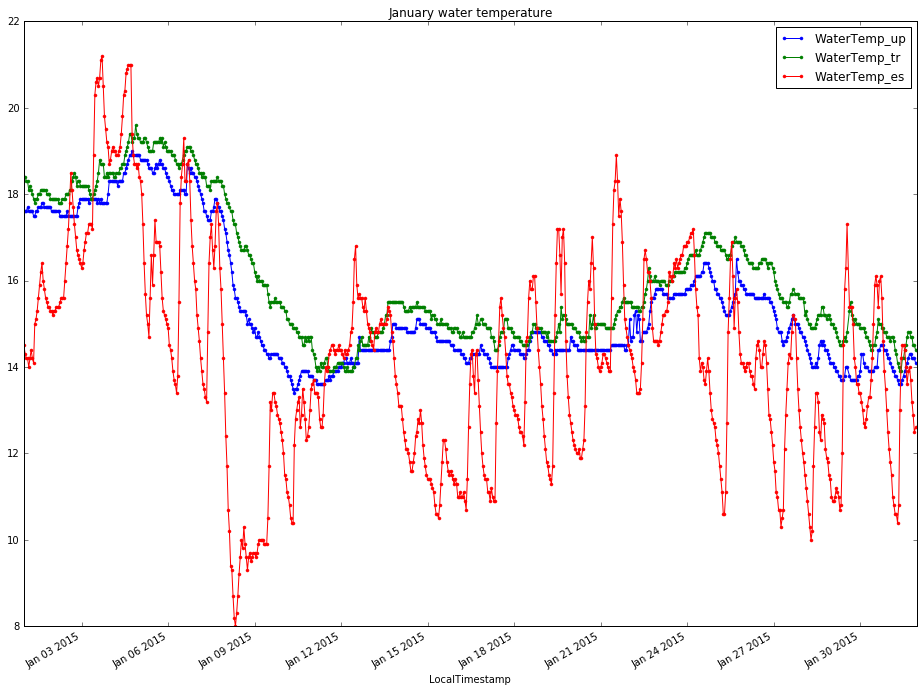

In [98]:
## use pd.concat to create a new dataframe composed of specific lsjr columns
df_wt = pd.concat([lsjr['WaterTemp_up'],lsjr['WaterTemp_tr'],lsjr['WaterTemp_es']],axis=1)

## create July subset and plot
df_wt_jul = df_wt[(df_wt.index.month == 7)]
df_wt_jul.dropna().plot(marker='.',title='July water temperature')

## create January subset and plot
df_wt_jan = df_wt[(df_wt.index.month == 1)]
df_wt_jan.dropna().plot(marker='.',title='January water temperature')

### 2.4 Upstream

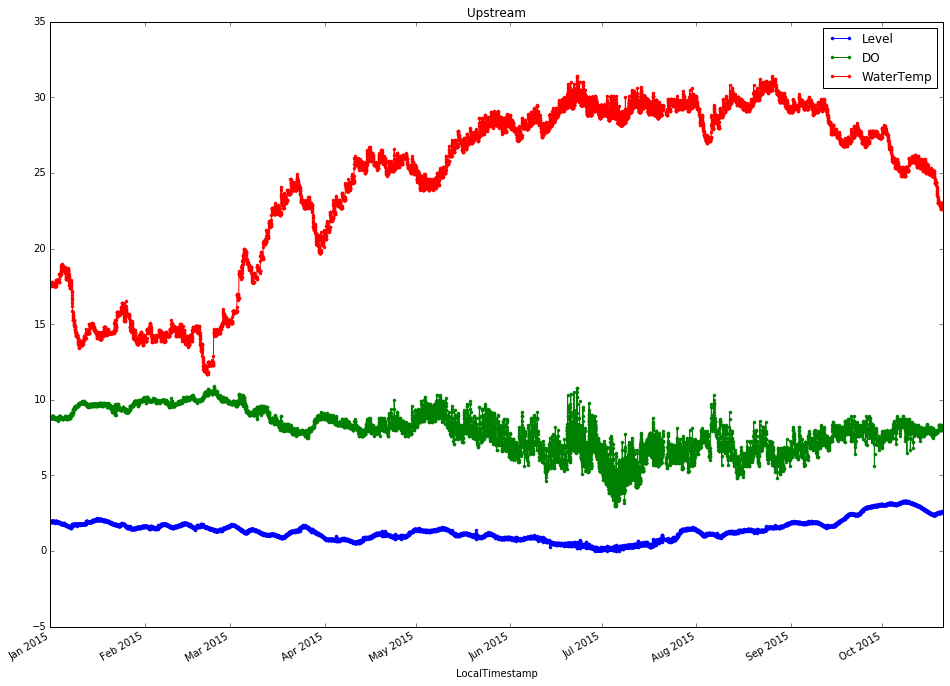

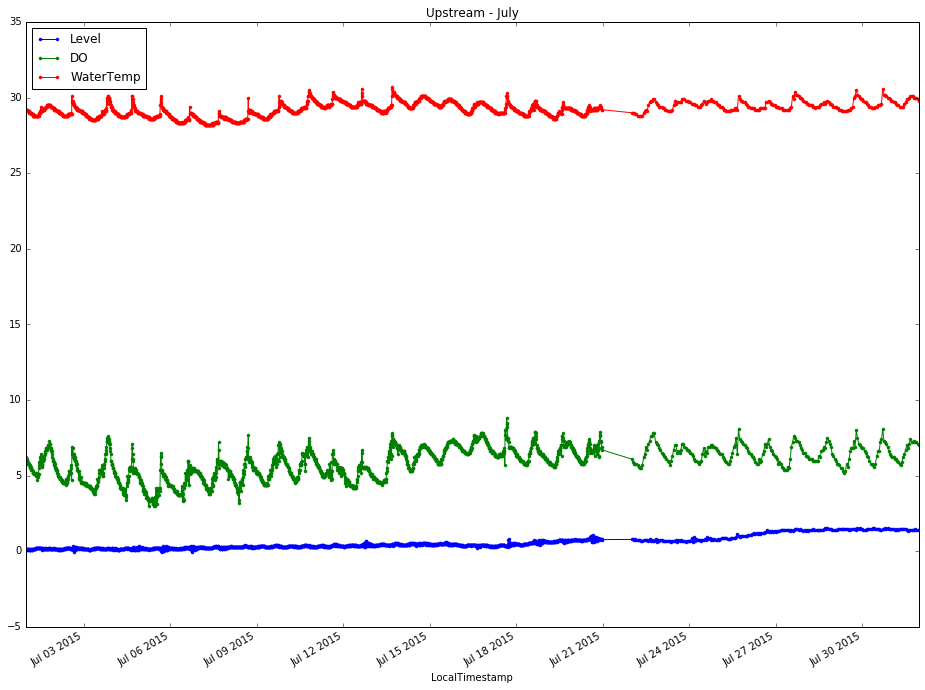

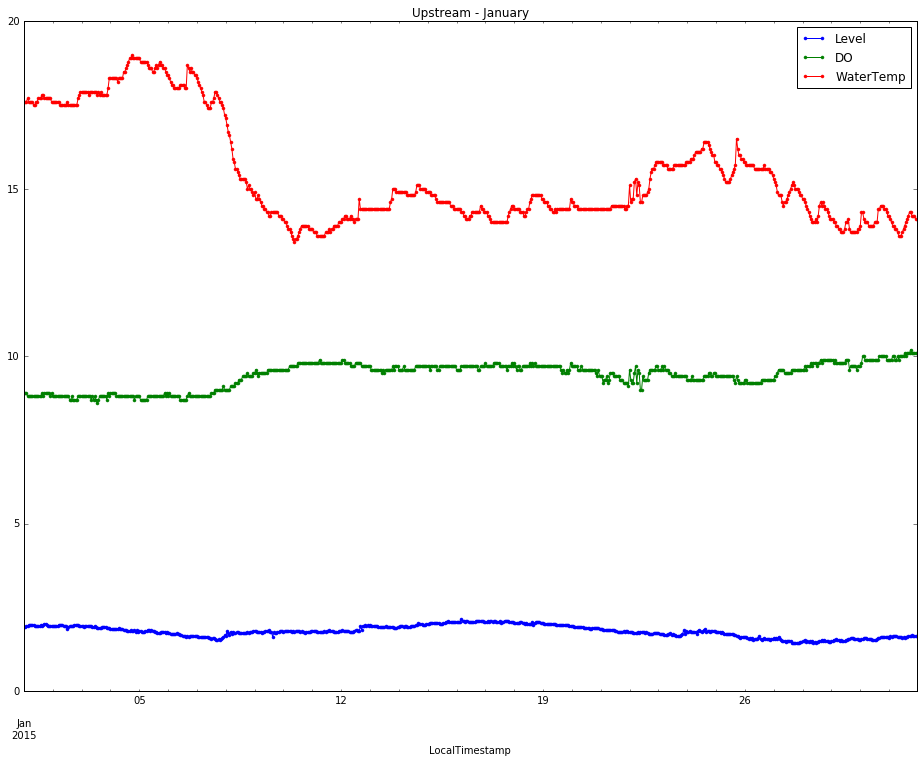

In [99]:
## plot entire upstream dataset
upstream.dropna().plot(marker='.',title='Upstream')

## create July subset and plot
upstream_jul = upstream[(upstream.index.month == 7)]
upstream_jul.dropna().plot(marker='.',title='Upstream - July')

## create January subset and plot
upstream_jan = upstream[(upstream.index.month == 1)]
upstream_jan.dropna().plot(marker='.',title='Upstream - January')

### 2.5 Transitional

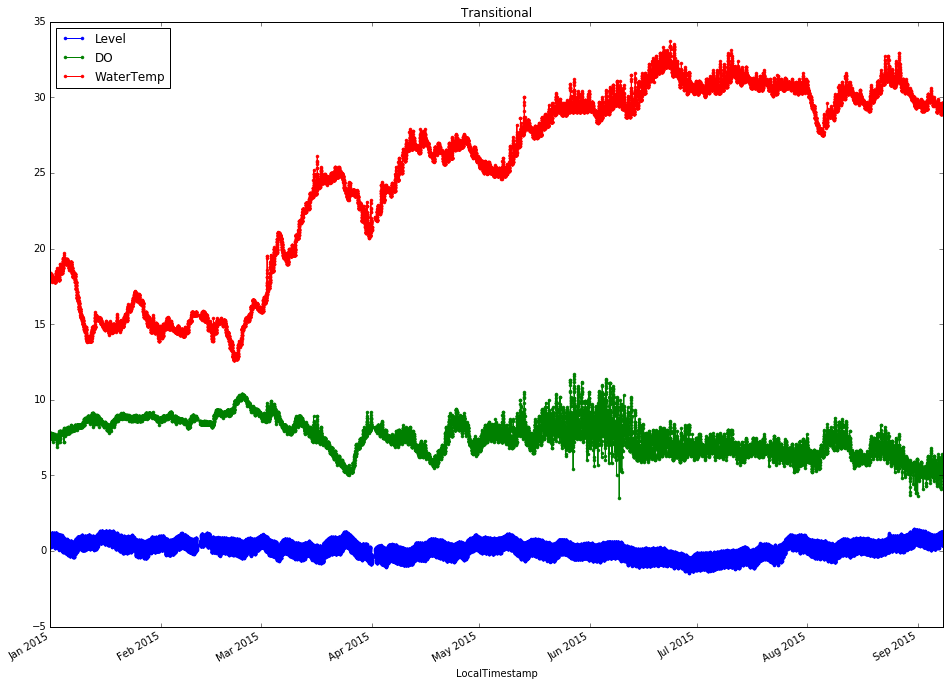

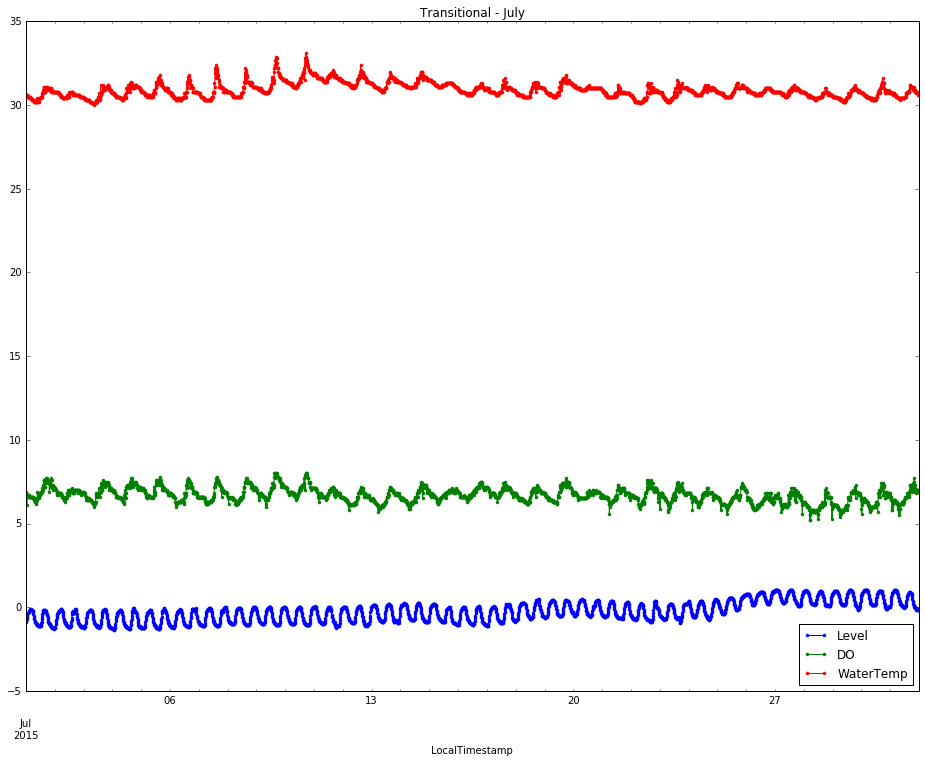

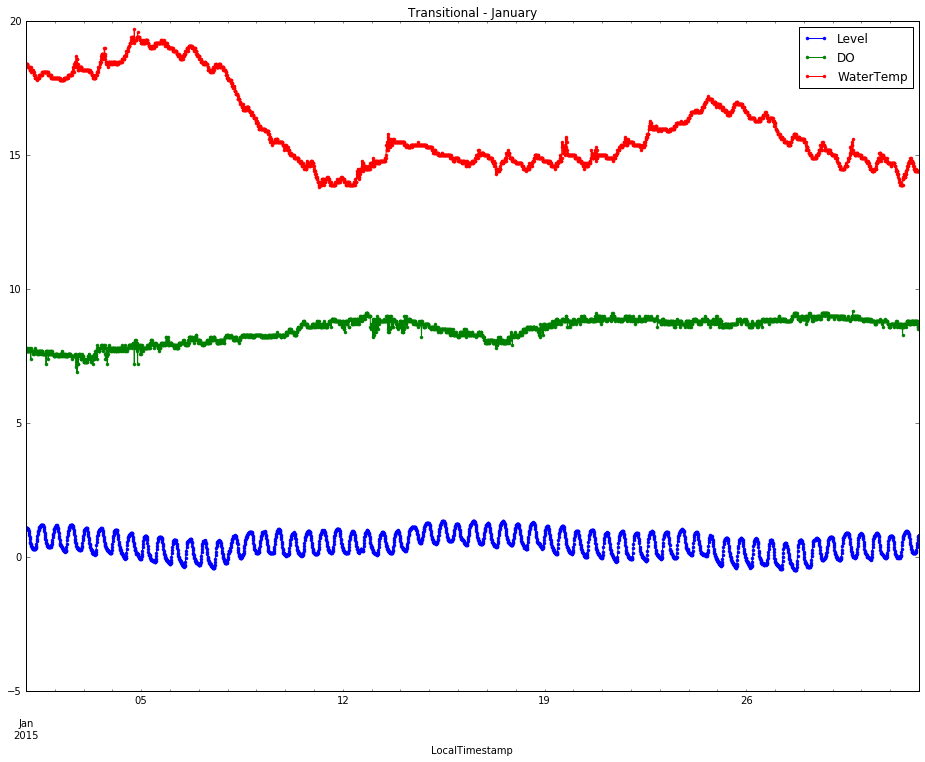

In [100]:
## plot entire transitional dataset
transitional.dropna().plot(marker='.',title='Transitional')

## create July subset and plot
transitional_jul = transitional[(transitional.index.month == 7)]
transitional_jul.dropna().plot(marker='.',title='Transitional - July')

## create January subset and plot
transitional_jan = transitional[(transitional.index.month == 1)]
transitional_jan.dropna().plot(marker='.',title='Transitional - January')

### 2.6 Estuarine

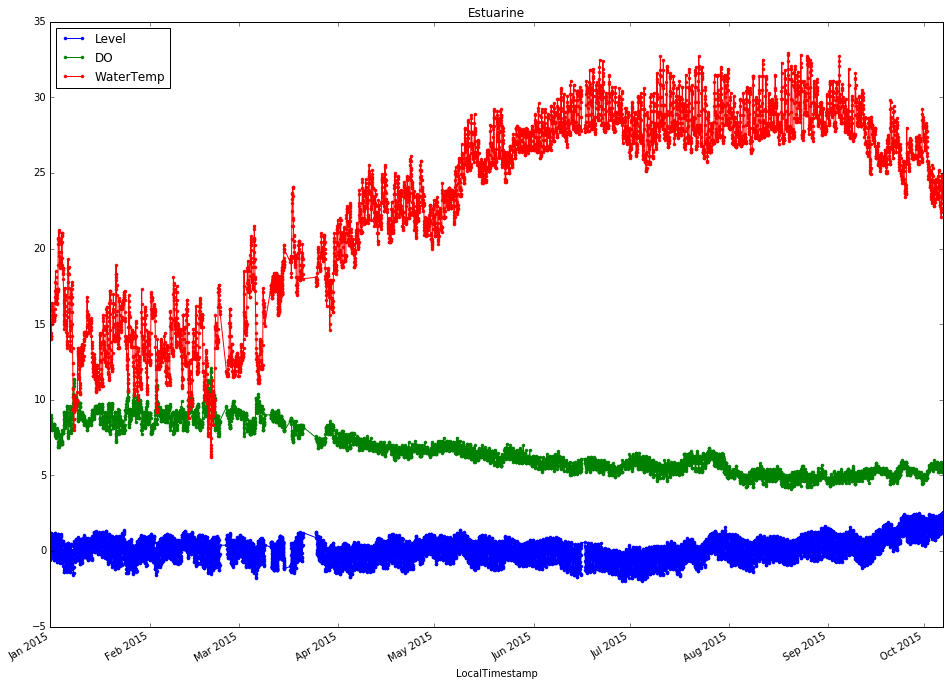

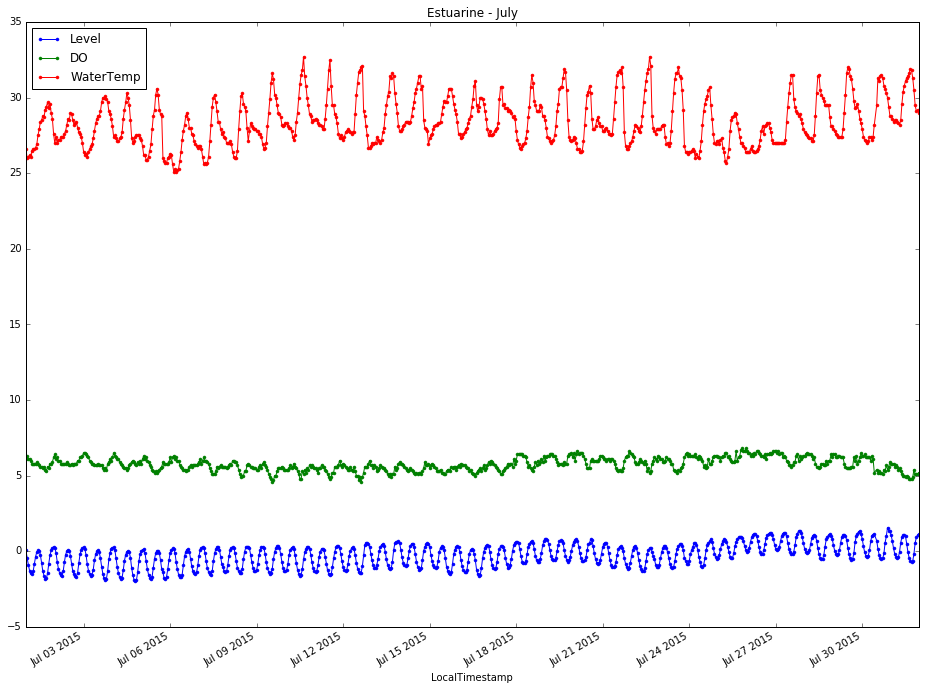

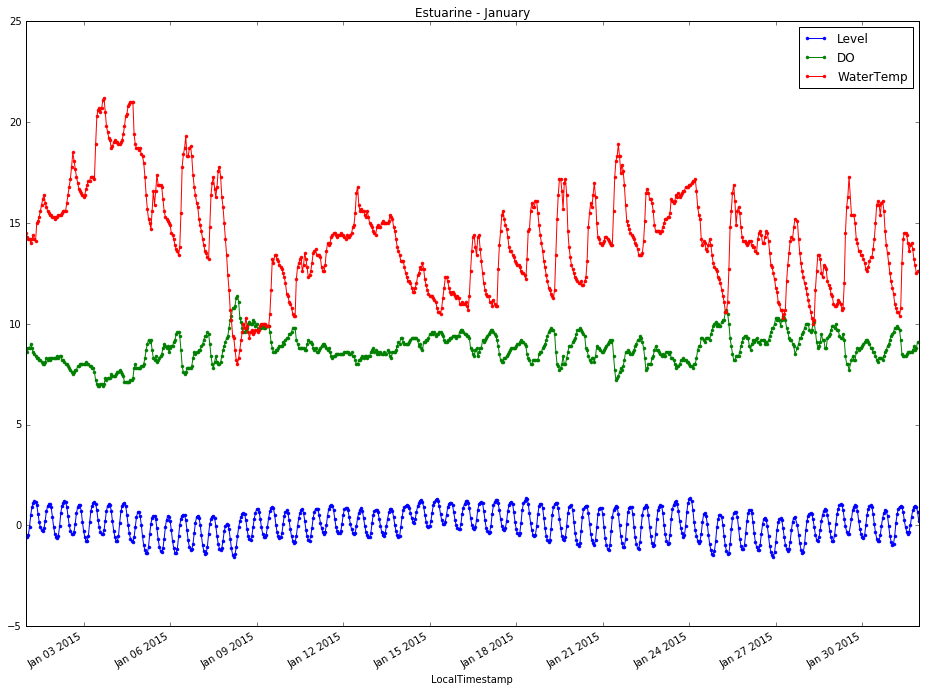

In [101]:
## plot entire estuarine dataset
estuarine.dropna().plot(marker='.',title='Estuarine')

## create July subset and plot
estuarine_jul = estuarine[(estuarine.index.month == 7)]
estuarine_jul.dropna().plot(marker='.',title='Estuarine - July')

## create January subset and plot
estuarine_jan = estuarine[(estuarine.index.month == 1)]
estuarine_jan.dropna().plot(marker='.',title='Estuarine - January')

# 3 Quantify

#### Now that you've visually inspected the time series and boxplots, calculate correlation and cross-correlation strength of the relationships that you were able to visually detect. But, remember, correlation does NOT = causation!

### 3.1 Correlations by river reach

#### Note: edit the cells below to look at specific months, i.e. upstream_jan.corr(), upstream_jul.corr()

In [102]:
upstream.corr()

,Level,DO,WaterTemp
Level,1.000000,0.511655,-0.432524
DO,0.511655,1.000000,-0.761935
WaterTemp,-0.432524,-0.761935,1.000000


In [103]:
transitional.corr()

,Level,DO,WaterTemp
Level,1.000000,0.017245,-0.210073
DO,0.017245,1.000000,-0.641332
WaterTemp,-0.210073,-0.641332,1.000000


In [104]:
estuarine.corr()

,Level,DO,WaterTemp
Level,1.000000,-0.086737,-0.011462
DO,-0.086737,1.000000,-0.955116
WaterTemp,-0.011462,-0.955116,1.000000


### 3.2 Cross-correlations

#### 3.2.1 Upstream

In [105]:
## lag of 1 = 1 hour for upstream and estuarine, 15 minutes for transitional 
## (remember the temporal resolution of the different datasets)
lag = 1

In [106]:
upstream_jul['DO'].dropna().corr(upstream_jul['WaterTemp'].dropna().shift(lag))

0.65077418240504925

In [107]:
upstream_jul['DO'].dropna().corr(upstream_jul['Level'].dropna().shift(lag))

0.45092953163348298

In [108]:
upstream_jan['DO'].dropna().corr(upstream_jan['WaterTemp'].dropna().shift(lag))

-0.92657696777632725

In [109]:
upstream_jan['DO'].dropna().corr(upstream_jan['Level'].dropna().shift(lag))

-0.036902491382764128

#### 3.2.2 Transitional

In [110]:
lag = 4

In [111]:
transitional_jul['DO'].dropna().corr(transitional_jul['WaterTemp'].dropna().shift(lag))

0.56492389713058155

In [112]:
transitional_jul['DO'].dropna().corr(transitional_jul['Level'].dropna().shift(lag))

-0.36938618222952407

In [113]:
transitional_jan['DO'].dropna().corr(transitional_jan['WaterTemp'].dropna().shift(lag))

-0.71206739233918825

In [114]:
transitional_jan['DO'].dropna().corr(transitional_jan['Level'].dropna().shift(lag))

-0.15415676138880124

#### 3.2.3 Estuarine

In [115]:
lag = 1

In [116]:
estuarine_jul['DO'].dropna().corr(estuarine_jul['WaterTemp'].dropna().shift(lag))

-0.60193670671041755

In [117]:
estuarine_jul['DO'].dropna().corr(estuarine_jul['Level'].dropna().shift(lag))

0.30885212253042515

In [118]:
estuarine_jan['DO'].dropna().corr(estuarine_jan['WaterTemp'].dropna().shift(lag))

-0.88784959753561787

In [119]:
estuarine_jan['DO'].dropna().corr(estuarine_jan['Level'].dropna().shift(lag))

-0.20445073547525111

# 4 Discuss

### Return to your assignment and answer the discussion questions.